<a href="https://colab.research.google.com/github/thisisanmolkumar/DL_Lab/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and Preprocess MNIST Data

In [1]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Original training images shape: {x_train.shape}")
print(f"Original training labels shape: {y_train.shape}")
print(f"Original testing images shape: {x_test.shape}")
print(f"Original testing labels shape: {y_test.shape}")

x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

print(f"Flattened training images shape: {x_train_flat.shape}")
print(f"Flattened testing images shape: {x_test_flat.shape}")

x_train_normalized = x_train_flat.astype('float32') / 255.0
x_test_normalized = x_test_flat.astype('float32') / 255.0

print(f"Normalized training images min: {np.min(x_train_normalized)}, max: {np.max(x_train_normalized)}")
print(f"Normalized testing images min: {np.min(x_test_normalized)}, max: {np.max(x_test_normalized)}")

num_classes = 10
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

print(f"One-hot encoded training labels shape: {y_train_one_hot.shape}")
print(f"One-hot encoded testing labels shape: {y_test_one_hot.shape}")

X_train, Y_train = x_train_normalized, y_train_one_hot
X_test, Y_test = x_test_normalized, y_test_one_hot

print("MNIST data loaded and preprocessed successfully.")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original training images shape: (60000, 28, 28)
Original training labels shape: (60000,)
Original testing images shape: (10000, 28, 28)
Original testing labels shape: (10000,)
Flattened training images shape: (60000, 784)
Flattened testing images shape: (10000, 784)
Normalized training images min: 0.0, max: 1.0
Normalized testing images min: 0.0, max: 1.0
One-hot encoded training labels shape: (60000, 10)
One-hot encoded testing labels shape: (10000, 10)
MNIST data loaded and preprocessed successfully.


## Initialize Neural Network Parameters

In [2]:
input_size = X_train.shape[1]
hidden_layer_size = 128
output_size = Y_train.shape[1]

W1 = np.random.randn(input_size, hidden_layer_size) * 0.01
b1 = np.zeros((1, hidden_layer_size))
W2 = np.random.randn(hidden_layer_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

parameters = {
    'W1': W1,
    'b1': b1,
    'W2': W2,
    'b2': b2
}

print("Neural network parameters initialized successfully.")
print(f"W1 shape: {parameters['W1'].shape}")
print(f"b1 shape: {parameters['b1'].shape}")
print(f"W2 shape: {parameters['W2'].shape}")
print(f"b2 shape: {parameters['b2'].shape}")

Neural network parameters initialized successfully.
W1 shape: (784, 128)
b1 shape: (1, 128)
W2 shape: (128, 10)
b2 shape: (1, 10)


## Implement Activation Functions

In [3]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    dR = np.array(Z > 0, dtype=np.float32)
    return dR

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

print("Activation functions (ReLU, ReLU derivative, Softmax) implemented successfully.")

Activation functions (ReLU, ReLU derivative, Softmax) implemented successfully.


## Implement Forward Propagation

In [4]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }

    return A2, cache

print("Forward propagation function implemented successfully.")

Forward propagation function implemented successfully.


## Implement Backward Propagation

In [5]:
def backward_propagation(X, Y, parameters, cache):
    m = X.shape[0]

    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    Z1 = cache['Z1']

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

    grads = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }

    return grads

print("Backward propagation function implemented successfully.")

Backward propagation function implemented successfully.


## Implement Parameter Update


In [6]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    updated_parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return updated_parameters

print("Parameter update function implemented successfully.")

Parameter update function implemented successfully.


## Train the Neural Network

In [7]:
def calculate_loss(A2, Y):
    m = Y.shape[0]
    logprobs = -np.log(np.maximum(A2, 1e-12)) * Y
    loss = np.sum(logprobs) / m
    return loss

def train_neural_network(X_train, Y_train, parameters, learning_rate, epochs, batch_size):
    loss_history = []
    accuracy_history = []
    m = X_train.shape[0]

    for epoch in range(epochs):
        permutation = np.random.permutation(m)
        X_shuffled = X_train[permutation]
        Y_shuffled = Y_train[permutation]

        epoch_loss = 0
        num_batches = int(np.ceil(m / batch_size))

        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, m)
            X_batch = X_shuffled[start_idx:end_idx]
            Y_batch = Y_shuffled[start_idx:end_idx]

            A2, cache = forward_propagation(X_batch, parameters)
            batch_loss = calculate_loss(A2, Y_batch)
            epoch_loss += batch_loss

            grads = backward_propagation(X_batch, Y_batch, parameters, cache)
            parameters = update_parameters(parameters, grads, learning_rate)

        epoch_loss /= num_batches
        loss_history.append(epoch_loss)

        A2_train, _ = forward_propagation(X_train, parameters)
        predictions = np.argmax(A2_train, axis=1)
        true_labels = np.argmax(Y_train, axis=1)
        accuracy = np.mean(predictions == true_labels) * 100
        accuracy_history.append(accuracy)

        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Accuracy: {accuracy:.2f}%")

    return parameters, loss_history, accuracy_history

learning_rate = 0.1
epochs = 100
batch_size = 64

print("Starting neural network training...")
final_parameters, training_loss_history, training_accuracy_history = train_neural_network(
    X_train, Y_train, parameters, learning_rate, epochs, batch_size
)

print("Training complete.")

Starting neural network training...
Epoch 1/100 - Loss: 0.5448 - Accuracy: 91.26%
Epoch 2/100 - Loss: 0.2430 - Accuracy: 94.14%
Epoch 3/100 - Loss: 0.1847 - Accuracy: 95.54%
Epoch 4/100 - Loss: 0.1487 - Accuracy: 96.33%
Epoch 5/100 - Loss: 0.1237 - Accuracy: 97.00%
Epoch 6/100 - Loss: 0.1058 - Accuracy: 97.13%
Epoch 7/100 - Loss: 0.0922 - Accuracy: 97.75%
Epoch 8/100 - Loss: 0.0818 - Accuracy: 98.03%
Epoch 9/100 - Loss: 0.0734 - Accuracy: 98.23%
Epoch 10/100 - Loss: 0.0663 - Accuracy: 98.45%
Epoch 11/100 - Loss: 0.0605 - Accuracy: 98.52%
Epoch 12/100 - Loss: 0.0548 - Accuracy: 98.70%
Epoch 13/100 - Loss: 0.0506 - Accuracy: 98.82%
Epoch 14/100 - Loss: 0.0462 - Accuracy: 98.91%
Epoch 15/100 - Loss: 0.0428 - Accuracy: 99.09%
Epoch 16/100 - Loss: 0.0393 - Accuracy: 99.08%
Epoch 17/100 - Loss: 0.0367 - Accuracy: 99.28%
Epoch 18/100 - Loss: 0.0337 - Accuracy: 99.31%
Epoch 19/100 - Loss: 0.0315 - Accuracy: 99.05%
Epoch 20/100 - Loss: 0.0295 - Accuracy: 99.27%
Epoch 21/100 - Loss: 0.0272 - Acc

## Evaluate Model Performance


In [8]:
print("Evaluating model performance on the test set...")

A2_test, _ = forward_propagation(X_test, final_parameters)
true_test_labels = np.argmax(Y_test, axis=1)
predicted_test_labels = np.argmax(A2_test, axis=1)
test_accuracy = np.mean(predicted_test_labels == true_test_labels) * 100

print(f"Test Accuracy: {test_accuracy:.2f}%")

Evaluating model performance on the test set...
Test Accuracy: 97.98%


## Visualize Training Progress


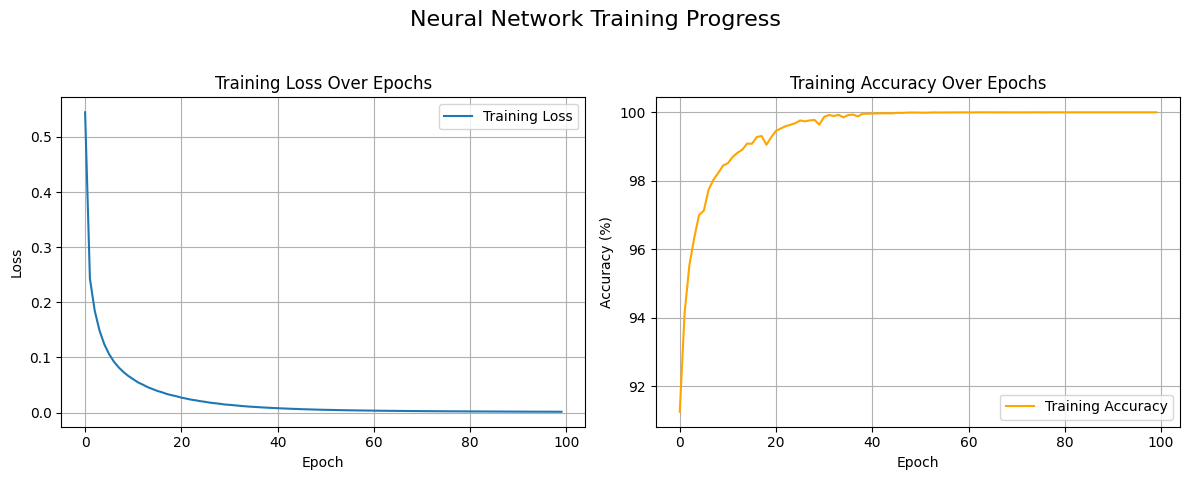

Training loss and accuracy plots generated successfully.


In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.suptitle('Neural Network Training Progress', fontsize=16)

plt.subplot(1, 2, 1)
plt.plot(range(epochs), training_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(epochs), training_accuracy_history, label='Training Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Training loss and accuracy plots generated successfully.")